# Codebase for Recommendtion System Implementation

## Part 1: Data Preparation
1. data loading
2. data transformation
3. Feature engineering (create new features upbeat and discoability)
4. Data splitting (features and target variable)

In [1]:
import pandas as pd

# Load the data from the file
df=pd.read_csv("https://raw.githubusercontent.com/Alex-Mak-MCW/SpotifyDataScienceProject/main/Data/processed_data.csv")

df.shape # (2455 rows × 20 columns)

(2455, 20)

In [2]:
# verify df
df

,track_name,artist,album,release_date,duration,popularity,explicit,lyrics,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,Blinding Lights,The Weeknd,After Hours,2020-03-20,200040,90,0,yeah ve tryna call ve long enough maybe show l...,0.514,0.730,1.0,-5.934,1.0,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4.0
1,Shape of You,Ed Sheeran,÷ (Deluxe),2017-03-03,233712,86,0,club nt best place find lover bar go mm friend...,0.825,0.652,1.0,-3.183,0.0,0.0802,0.58100,0.000000,0.0931,0.931,95.977,4.0
2,Someone You Loved,Lewis Capaldi,Divinely Uninspired To A Hellish Extent,2019-05-17,182160,89,0,m going time fear s one save nothing really ...,0.501,0.405,1.0,-5.679,1.0,0.0319,0.75100,0.000000,0.1050,0.446,109.891,4.0
3,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,Hollywood's Bleeding,2019-09-06,157560,85,0,2 post malone wow 3 saweetie tap feat post ma...,0.755,0.522,2.0,-4.368,1.0,0.0575,0.53300,0.000000,0.0685,0.925,89.960,4.0
4,Starboy,The Weeknd,Starboy,2016-11-25,230453,91,1,ayy m tryna put worst mood ah p1 cleaner chur...,0.679,0.587,7.0,-7.015,1.0,0.2760,0.14100,0.000006,0.1370,0.486,186.003,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,512,Mora,Primer Dia de Clases,2021-02-05,193636,75,1,NaN,0.818,0.673,4.0,-7.542,0.0,0.1480,0.34800,0.000000,0.1720,0.695,87.961,4.0
2451,Diosa,Myke Towers,Easy Money Baby,2020-01-24,214013,72,1,NaN,0.801,0.745,6.0,-3.733,0.0,0.0630,0.39800,0.006030,0.1530,0.245,104.965,4.0
2452,A-Punk,Vampire Weekend,Vampire Weekend,2008-01-29,137760,70,0,johanna drove slowly city hudson river filled ...,0.551,0.819,2.0,-4.489,1.0,0.0525,0.01030,0.043700,0.1530,0.846,174.917,4.0
2453,TQM,Fuerza Regida,TQM,2023-05-19,158965,78,1,NaN,0.786,0.853,5.0,-4.955,0.0,0.0589,0.27300,0.000000,0.1060,0.963,125.107,3.0


In [3]:
# data transformation: duration into mins
df['duration_min'] = df['duration']/60000
df['duration_min']

0       3.334000
1       3.895200
2       3.036000
3       2.626000
4       3.840883
          ...   
2450    3.227267
2451    3.566883
2452    2.296000
2453    2.649417
2454    3.936917
Name: duration_min, Length: 2455, dtype: float64

In [4]:
# drop duration and lyrics since they do not impact the models I will build
df.drop(['lyrics', 'duration'], axis=1, inplace=True)

In [5]:
# observe the features that will be used in a model
df.iloc[:, 4:]

,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_min
0,90,0,0.514,0.730,1.0,-5.934,1.0,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4.0,3.334000
1,86,0,0.825,0.652,1.0,-3.183,0.0,0.0802,0.58100,0.000000,0.0931,0.931,95.977,4.0,3.895200
2,89,0,0.501,0.405,1.0,-5.679,1.0,0.0319,0.75100,0.000000,0.1050,0.446,109.891,4.0,3.036000
3,85,0,0.755,0.522,2.0,-4.368,1.0,0.0575,0.53300,0.000000,0.0685,0.925,89.960,4.0,2.626000
4,91,1,0.679,0.587,7.0,-7.015,1.0,0.2760,0.14100,0.000006,0.1370,0.486,186.003,4.0,3.840883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,75,1,0.818,0.673,4.0,-7.542,0.0,0.1480,0.34800,0.000000,0.1720,0.695,87.961,4.0,3.227267
2451,72,1,0.801,0.745,6.0,-3.733,0.0,0.0630,0.39800,0.006030,0.1530,0.245,104.965,4.0,3.566883
2452,70,0,0.551,0.819,2.0,-4.489,1.0,0.0525,0.01030,0.043700,0.1530,0.846,174.917,4.0,2.296000
2453,78,1,0.786,0.853,5.0,-4.955,0.0,0.0589,0.27300,0.000000,0.1060,0.963,125.107,3.0,2.649417


In [6]:
# observe the statistics of the model-used features
df.iloc[:, 4:].describe()

,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_min
count,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000
mean,74.689613,0.300611,0.650165,0.649584,5.332383,-6.552519,0.594705,0.092943,0.216581,0.021428,0.172252,0.508771,120.651448,3.945825,3.671897
std,11.182444,0.458617,0.149517,0.182336,3.622396,2.896937,0.491049,0.090221,0.246266,0.108462,0.134431,0.231522,28.619425,0.329106,0.880452
min,0.000000,0.000000,0.000000,0.003420,0.000000,-28.460000,0.000000,0.000000,0.000008,0.000000,0.021000,0.000000,0.000000,0.000000,1.066983
25%,72.000000,0.000000,0.554000,0.536000,2.000000,-7.806000,0.000000,0.037800,0.028900,0.000000,0.091150,0.328500,98.006000,4.000000,3.157767
50%,76.000000,0.000000,0.666000,0.670000,5.000000,-5.980000,1.000000,0.054900,0.115000,0.000001,0.120000,0.504000,119.705000,4.000000,3.573333
75%,80.000000,1.000000,0.759000,0.787000,8.000000,-4.668000,1.000000,0.105000,0.321000,0.000123,0.208000,0.693500,138.769000,4.000000,4.042142
max,100.000000,1.000000,0.970000,0.995000,11.000000,-0.514000,1.000000,0.592000,0.994000,1.000000,0.970000,0.981000,210.164000,5.000000,10.217100


In [7]:
# Feature Engineering: create features upbeat that incorparates danceability and energy

# upbeat feature: average of top 2 most correlated variables
sum_upbeat = df['danceability'] + df['energy']
df['upbeat'] = sum_upbeat/2

# discoability features: average of top 3 most correlated variables
df['discoability']=(df['danceability'] + df['energy']+df['loudness'])/3

# print df to verify changes
df

,track_name,artist,album,release_date,popularity,explicit,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_min,upbeat,discoability
0,Blinding Lights,The Weeknd,After Hours,2020-03-20,90,0,0.514,0.730,1.0,-5.934,...,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4.0,3.334000,0.6220,-1.563333
1,Shape of You,Ed Sheeran,÷ (Deluxe),2017-03-03,86,0,0.825,0.652,1.0,-3.183,...,0.0802,0.58100,0.000000,0.0931,0.931,95.977,4.0,3.895200,0.7385,-0.568667
2,Someone You Loved,Lewis Capaldi,Divinely Uninspired To A Hellish Extent,2019-05-17,89,0,0.501,0.405,1.0,-5.679,...,0.0319,0.75100,0.000000,0.1050,0.446,109.891,4.0,3.036000,0.4530,-1.591000
3,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,Hollywood's Bleeding,2019-09-06,85,0,0.755,0.522,2.0,-4.368,...,0.0575,0.53300,0.000000,0.0685,0.925,89.960,4.0,2.626000,0.6385,-1.030333
4,Starboy,The Weeknd,Starboy,2016-11-25,91,1,0.679,0.587,7.0,-7.015,...,0.2760,0.14100,0.000006,0.1370,0.486,186.003,4.0,3.840883,0.6330,-1.916333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,512,Mora,Primer Dia de Clases,2021-02-05,75,1,0.818,0.673,4.0,-7.542,...,0.1480,0.34800,0.000000,0.1720,0.695,87.961,4.0,3.227267,0.7455,-2.017000
2451,Diosa,Myke Towers,Easy Money Baby,2020-01-24,72,1,0.801,0.745,6.0,-3.733,...,0.0630,0.39800,0.006030,0.1530,0.245,104.965,4.0,3.566883,0.7730,-0.729000
2452,A-Punk,Vampire Weekend,Vampire Weekend,2008-01-29,70,0,0.551,0.819,2.0,-4.489,...,0.0525,0.01030,0.043700,0.1530,0.846,174.917,4.0,2.296000,0.6850,-1.039667
2453,TQM,Fuerza Regida,TQM,2023-05-19,78,1,0.786,0.853,5.0,-4.955,...,0.0589,0.27300,0.000000,0.1060,0.963,125.107,3.0,2.649417,0.8195,-1.105333


In [8]:
# identify the features (X)
x = df.iloc[:, 4:] # all numeric features
X = x.drop('valence', axis=1)

In [9]:
# Perform box-cox transformation on the target variable valence(y) 
import numpy as np
from scipy import stats 

# Since data has 0 (not positive), add a small constant to ensure all data is positive
# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Apply sigmoid transformation to your bounded response variable
y = sigmoid(df['valence'])

In [10]:
# print the names of the features
import numpy as np
col_list=list(np.array(X.columns))
col_list

['popularity',
 'explicit',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'tempo',
 'time_signature',
 'duration_min',
 'upbeat',
 'discoability']

## Part 2: Data analysis

1. Correlation Analysis
2. Multicolinarity Analysis (VIF)
3. More Data transformation
4. Data splitting (80-10-10 train-valdiation-test split)

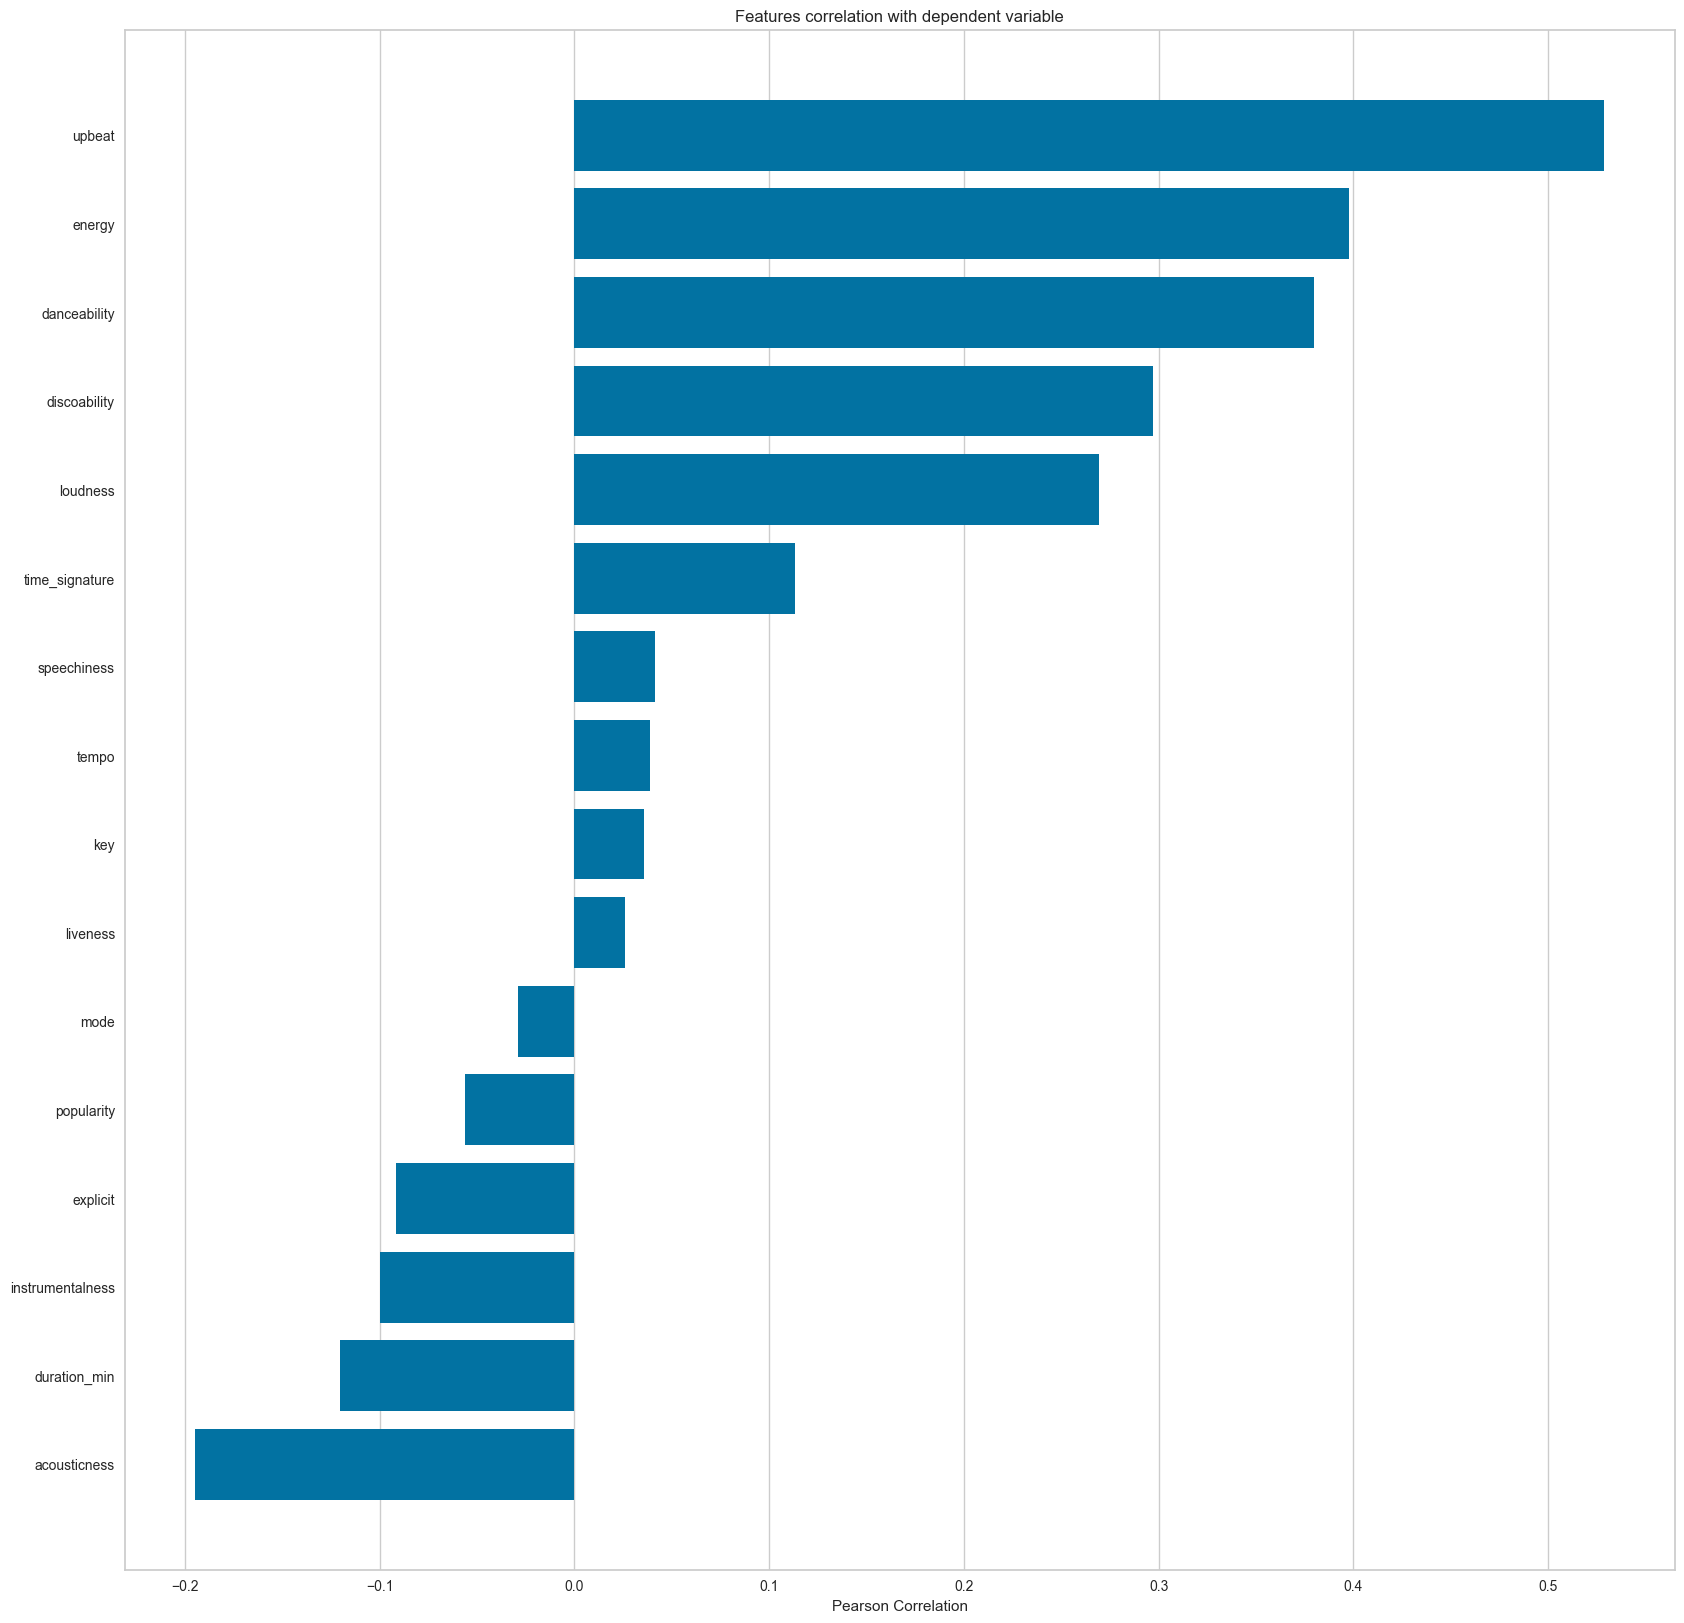

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [11]:
# 1.1 feature correlation
import matplotlib.pyplot as plt
from yellowbrick.target import FeatureCorrelation

features = np.array(np.array(X.columns))

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features, sort=True, colors=['blue', 'green', 'red', 'orange', 'purple'])

plt.rcParams['figure.figsize']=(20,20)
visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()

In [12]:
# Calculate and print the correlation values sorted in descending order
correlation_values = pd.DataFrame(visualizer.features_, columns=['Feature'])
correlation_values['Correlation'] = visualizer.scores_
correlation_values_sorted = correlation_values.sort_values(by='Correlation', ascending=False)
print(correlation_values_sorted)

             Feature  Correlation
15            upbeat     0.528836
14            energy     0.397888
13      danceability     0.379580
12      discoability     0.296893
11          loudness     0.269331
10    time_signature     0.113468
9        speechiness     0.041394
8              tempo     0.038955
7                key     0.035895
6           liveness     0.025920
5               mode    -0.028962
4         popularity    -0.056163
3           explicit    -0.091680
2   instrumentalness    -0.099743
1       duration_min    -0.120277
0       acousticness    -0.194790


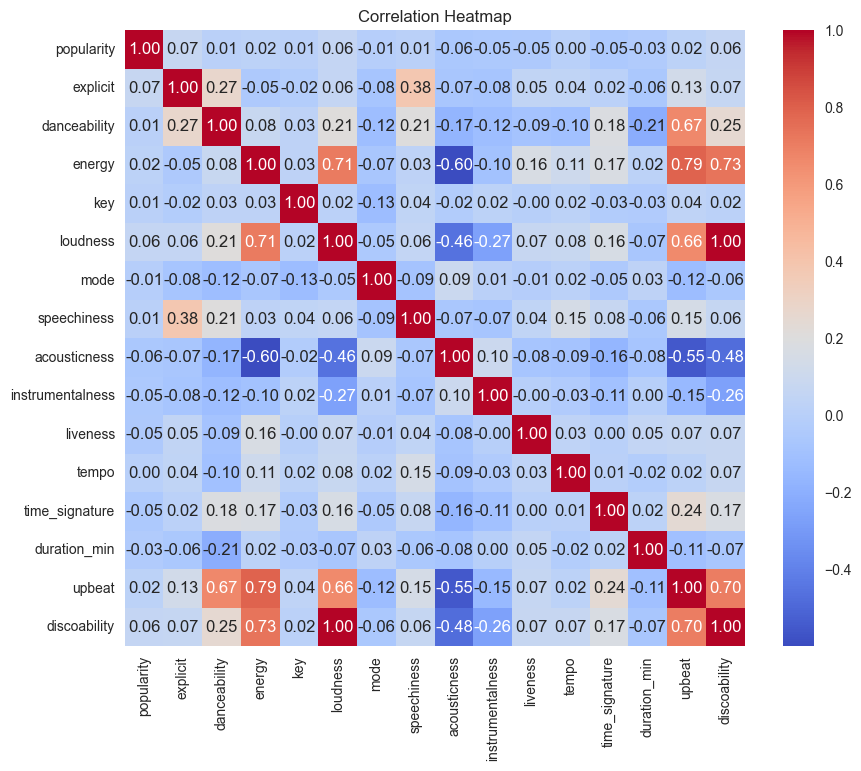

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the correlation matrix
correlation_matrix = X.corr()

# Display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


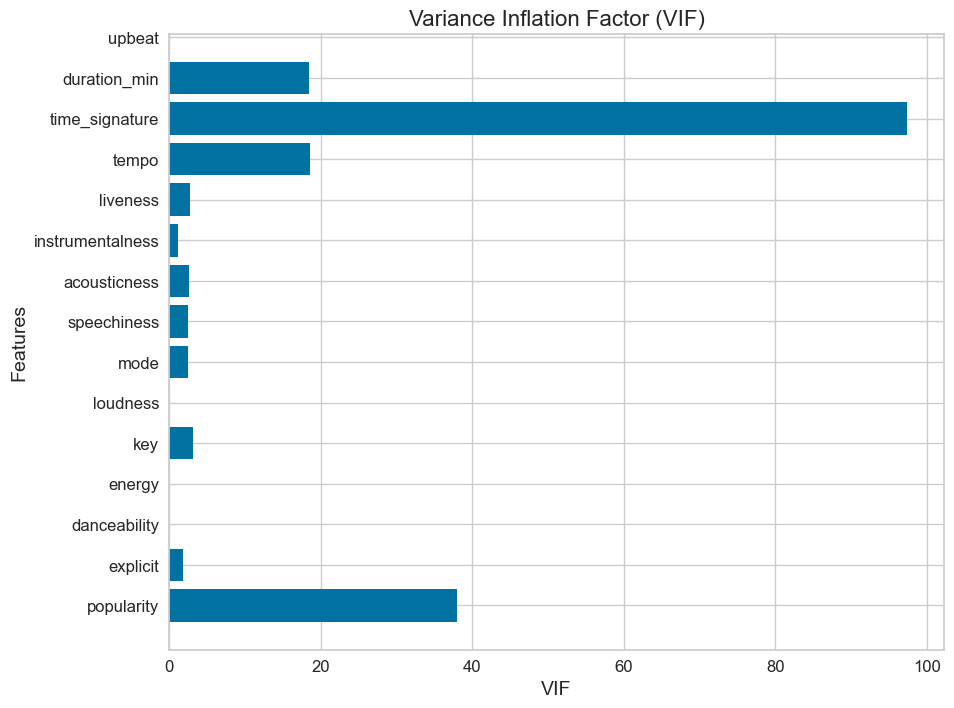

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Plot VIF
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
plt.barh(vif_data["feature"], vif_data["VIF"])
plt.xlabel('VIF', fontsize=14)  # Adjust font size as needed
plt.ylabel('Features', fontsize=14)  # Adjust font size as needed
plt.title('Variance Inflation Factor (VIF)', fontsize=16)  # Adjust font size as needed
plt.tick_params(axis='both', which='major', labelsize=12)  # Adjust tick label font size as needed

plt.show()


In [15]:
X=X.drop(['time_signature', 'popularity' ], axis=1)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


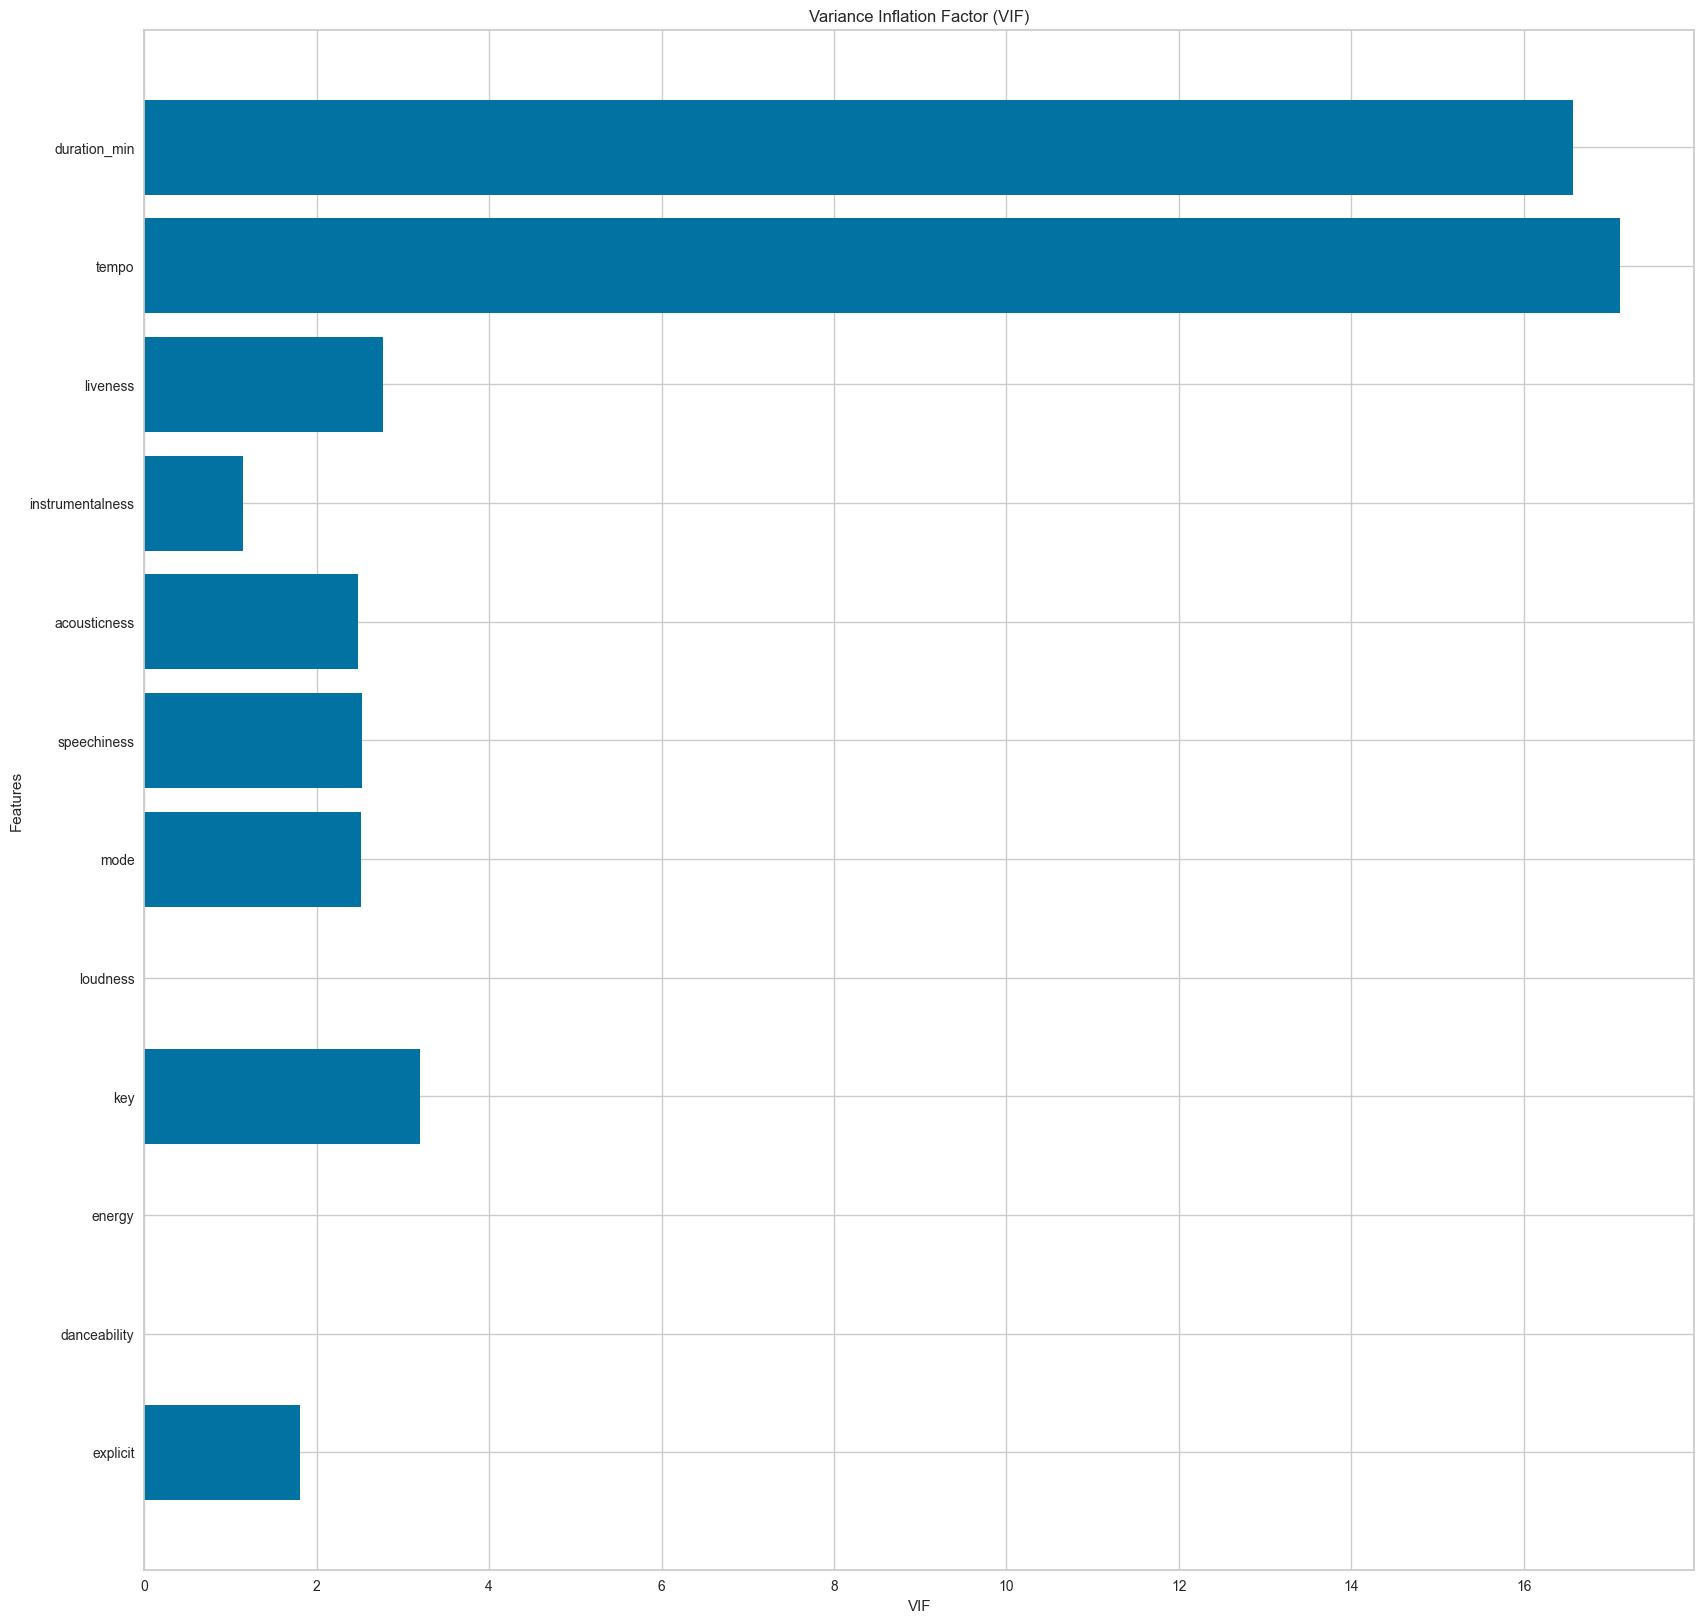

In [16]:
# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Plot VIF
plt.barh(vif_data["feature"], vif_data["VIF"])
plt.xlabel('VIF')
plt.ylabel('Features')
plt.title('Variance Inflation Factor (VIF)')
plt.show()

In [17]:
X=X.drop(['duration_min', 'tempo' ], axis=1)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


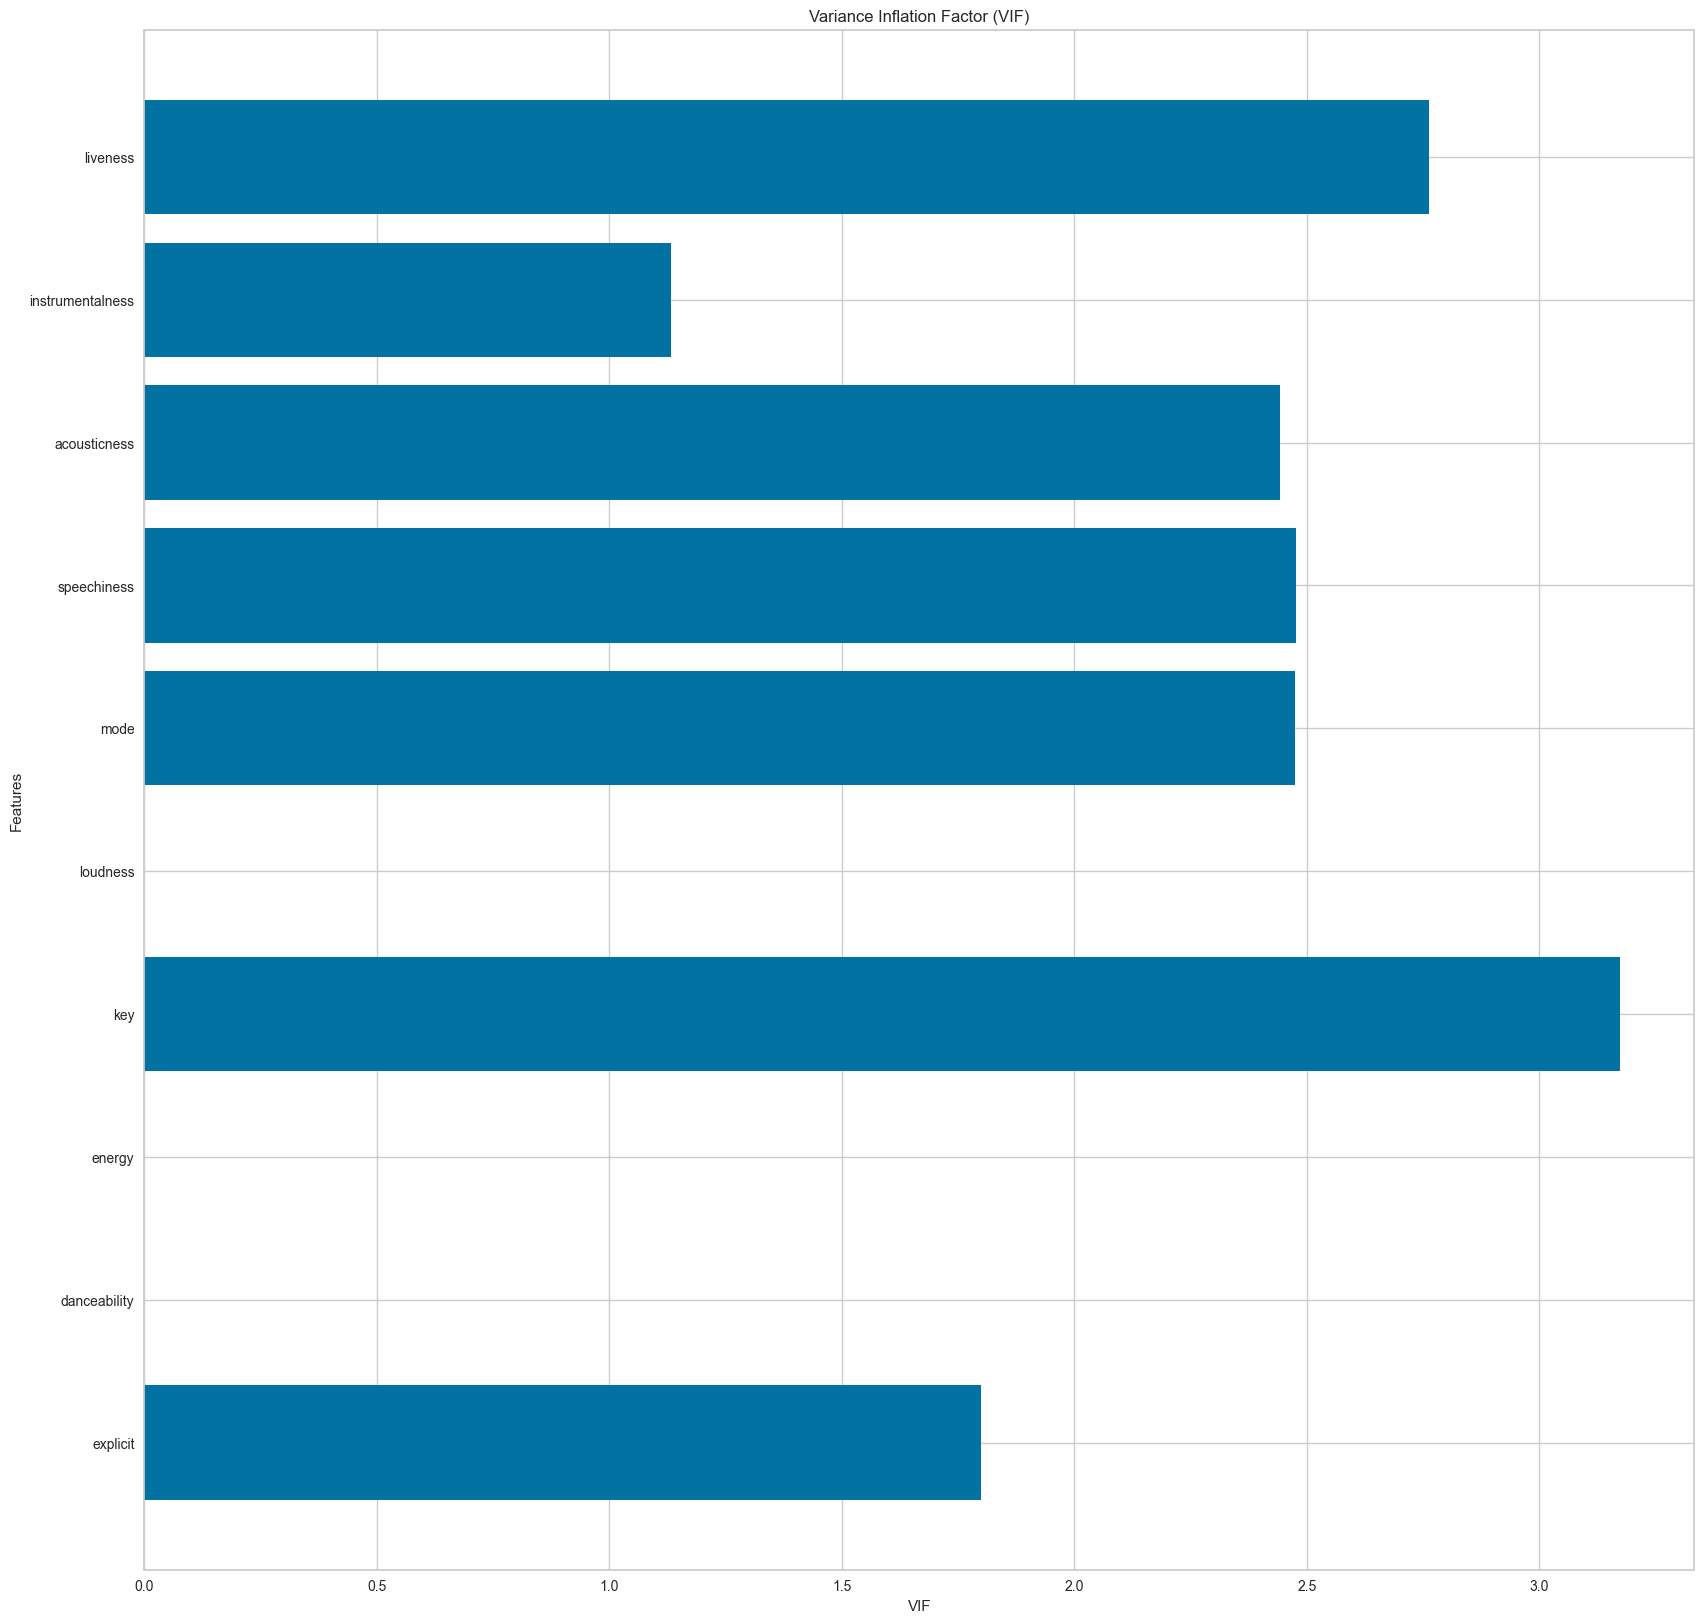

In [18]:
# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Plot VIF
plt.barh(vif_data["feature"], vif_data["VIF"])
plt.xlabel('VIF')
plt.ylabel('Features')
plt.title('Variance Inflation Factor (VIF)')
plt.show()

In [19]:
# check shape of x
print(X.shape) # (2455, 12)
print(y.shape) # (2455,)

(2455, 12)
(2455,)


In [20]:
from sklearn.model_selection import train_test_split

# Split the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
# X_train, X_test, y_train, y_test = train_test_split(X,y_scaled_series, test_size = 0.2, random_state = 42)

# split the 20% by half (10% test, 10% validation)
X_val, X_test, y_val, y_test=train_test_split(X_test,y_test,test_size=0.5)

# verify new data shapes
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(1964, 12)
(245, 12)
(246, 12)


## Part 3. ML Model development

### Task: predict a song's valence based on its numerical features

### I will explore 3 regression models: linear regression(baseline), polynomial regression, and random forest

## For each model I implement, I will do the following steps:
1. Model training and fitting using the training datset to obtain the training accuracy before tuning
2. Model evaluation: analyze feature importance
3. Model optimization through hyperparameter tuning and feature selection within an automated pipeline
4. Fit the model again with the optimal hyperparameters to obtain the training accuracy after tuning
5. Make predictions with the tuned model to obtain the testing accuracy
6. Save the tuned model to future reproducibility and testing (TEMP)
7. Display all of the metrics of the model together (training before tuning, training after tuning, and testing) for comparison purpose. 
8. Visualize the model's performance through an array of visualziation tools:

* Classification Report
* Confusion Matrix
* Class-wise Performacne Metrics
* Reciever Operating Characteristic (ROC) curve
* Precision-Recall Curve

### Model 1: Linear Regression

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Model 1.1 Linear Regression (original)
# time consumed: <1s

# Fit the model on the training data
LR = LinearRegression()
LR.fit(X_train, y_train)

# Make predictions on the training data
LR_train_pred = LR.predict(X_train)
LR_r_squared_train = r2_score(y_train, LR_train_pred)
LR_mse_train = mean_squared_error(y_train, LR_train_pred)

# Define the pipeline
LR_pipeline = Pipeline([
    ('regression', LinearRegression())  # Linear Regression as the model
])

# Define the hyperparameters to tune
LR_param_grid = {
    'regression__fit_intercept': [True, False],  # Example hyperparameter for Linear Regression
    # 'regression__normalize': [True, False],  # Whether to normalize the features or not
}

# Perform grid search cross-validation (5 fold CV) on validation data
LR_grid_search = GridSearchCV(LR_pipeline, LR_param_grid, cv=5, scoring='neg_mean_squared_error')
LR_grid_search.fit(X_val, y_val)

# Get the best hyperparameters
LR_best_params = LR_grid_search.best_params_

# Print validation accuracy after hyperparameter tuning

LR_best_model_train_pred = LR_grid_search.predict(X_train)
LR_best_model_mse_train=mean_squared_error(y_train, LR_best_model_train_pred)
LR_best_model_r_squared_train = r2_score(y_train, LR_best_model_train_pred)

# Make predictions on validation data using best model
LR_best_model_val_pred = LR_grid_search.predict(X_val)
LR_best_model_mse_val=mean_squared_error(y_val, LR_best_model_val_pred)
LR_best_model_r_squared_val = r2_score(y_val, LR_best_model_val_pred)

# Refit the model with the best parameters using train + validation data
LR_best_model = Pipeline([
    ('regression', LinearRegression(fit_intercept=LR_best_params['regression__fit_intercept']))
])
LR_best_model.fit(X_train, y_train)  # Refit with the combined training and validation data

# Make predictions on the test set
LR_y_pred_test = LR_best_model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE) and R-squared on the testing data
LR_mse_test = mean_squared_error(y_test, LR_y_pred_test)
LR_r_squared_test = r2_score(y_test, LR_y_pred_test)

In [22]:

# Accuracy comparsion
print("For Model 1.1 Linear Regression")
print("----------------------------------------------------------------------------------------------------")
print("Accuracy in training set(1):")
print("Training MSE: \t\t\t\t{0}% \t({1})".format(LR_mse_train*100, LR_mse_train))
print("Training R-Squared: \t\t\t{0}".format(LR_r_squared_train))
print("----------------------------------------------------------------------------------------------------")
print("Accuracy in vaildation set(2):")
print("Best hyperparameters:\t\t\t", LR_best_params)
print("Training MSE: \t\t\t\t{0}% \t({1})".format(LR_best_model_mse_train*100, LR_best_model_mse_train))
print("Training R-Squared: \t\t\t{0}".format(LR_best_model_r_squared_train))
print("\nVaildation MSE: \t\t\t{0}% \t({1})".format(LR_best_model_mse_val*100, LR_best_model_mse_val))
print("Vaildation R-Squared: \t\t\t{0}".format(LR_best_model_r_squared_val))

print("----------------------------------------------------------------------------------------------------")
print("Accuracy in testing set(3):")
print("Testing MSE: \t\t\t\t{0}% \t({1})".format(LR_mse_test*100, LR_mse_test))
print("Testing R-Squared: \t\t\t{0}".format(LR_r_squared_test))

For Model 1.1 Linear Regression
----------------------------------------------------------------------------------------------------
Accuracy in training set(1):
Training MSE: 				0.19280048686154383% 	(0.0019280048686154383)
Training R-Squared: 			0.34234782984154544
----------------------------------------------------------------------------------------------------
Accuracy in vaildation set(2):
Best hyperparameters:			 {'regression__fit_intercept': True}
Training MSE: 				0.20428666129568826% 	(0.0020428666129568827)
Training R-Squared: 			0.3031679104004791

Vaildation MSE: 			0.16854188943436937% 	(0.0016854188943436939)
Vaildation R-Squared: 			0.3694722958809782
----------------------------------------------------------------------------------------------------
Accuracy in testing set(3):
Testing MSE: 				0.2162850480828895% 	(0.002162850480828895)
Testing R-Squared: 			0.23936980965677723


In [23]:
import joblib
# save the trained model (LR original)
joblib.dump(LR_grid_search.best_estimator_,'LR_original_model.pkl')
joblib.dump(LR_grid_search.best_params_,'LR_original_best_params.joblib')

['LR_original_best_params.joblib']

In [24]:
# loaded the saved model (NOTE: uncomment only if needed)
loaded_model=joblib.load('LR_original_model.pkl')
loaded_model_best_params=joblib.load('LR_original_best_params.joblib')

In [25]:
# Model 1.2
# Linear Regression (with stepwise selection)
# time consumed: ~2s

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Fit Linear Regression model
LR = LinearRegression()
LR.fit(X_train, y_train)

# ADDED STEP: Perform stepwise selection using backward elimination
X_train_with_const = sm.add_constant(X_train)
initial_model = sm.OLS(y_train, X_train_with_const).fit()

# Refined model using backward elimination
while True:
    p_values = initial_model.pvalues[1:]  # Exclude the constant term
    max_p_value = p_values.max()

    if max_p_value > 0.05:
        feature_to_remove = p_values.idxmax()
        X_train_with_const.drop(columns=[feature_to_remove], inplace=True)
        print(f"Removing feature '{feature_to_remove}' (p-value: {max_p_value})")
        initial_model = sm.OLS(y_train, X_train_with_const).fit()
    # until no more p values > 0.05
    else:
        break

selected_features = X_train_with_const.columns.tolist()[1:]  # Exclude the constant term
print(selected_features)

Removing feature 'mode' (p-value: 0.5433135959728697)
Removing feature 'key' (p-value: 0.536547206270936)
Removing feature 'liveness' (p-value: 0.5224205051834474)
Removing feature 'speechiness' (p-value: 0.444132983703149)
['explicit', 'danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'upbeat', 'discoability']


In [26]:
# 1.2 continued

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Subset of data
X_train_selected = X_train[selected_features]
X_val_selected = X_val[selected_features]
X_test_selected = X_test[selected_features]

# Fit regular regression on selected features
step_LR = LinearRegression()
step_LR.fit(X_train_selected, y_train)

# Make predictions on the training data
step_LR_train_pred = step_LR.predict(X_train_selected)
step_LR_r_squared_train = r2_score(y_train, step_LR_train_pred)
step_LR_mse_train = mean_squared_error(y_train, step_LR_train_pred)

# Define the pipeline
step_LR_pipeline = Pipeline([
    ('regression', LinearRegression())  # Linear Regression as the model
])

# Define the hyperparameters to tune
step_LR_param_grid = {
    'regression__fit_intercept': [True, False],
    'regression__copy_X': [True, False],
    'regression__positive': [True, False],
    'regression__n_jobs': [None, -1],
}

# Perform grid search cross-validation (5 fold CV) on validation data
step_LR_grid_search = GridSearchCV(step_LR_pipeline, step_LR_param_grid, cv=5, scoring='neg_mean_squared_error')
step_LR_grid_search.fit(X_val_selected, y_val)

# Get the best hyperparameters
step_LR_best_params = step_LR_grid_search.best_params_

# Refit the model with the best parameters using train + validation data
step_LR_best_model = Pipeline([
    ('regression', LinearRegression(fit_intercept=step_LR_best_params['regression__fit_intercept'],
                                    copy_X=step_LR_best_params['regression__copy_X'],
                                    positive=step_LR_best_params['regression__positive'],
                                    n_jobs=step_LR_best_params['regression__n_jobs']))
])
step_LR_best_model.fit(X_train_selected, y_train)  # Refit with the combined training and validation data

# Make predictions on the training set with the best model
step_LR_best_model_train_pred = step_LR_best_model.predict(X_train_selected)
step_LR_best_model_r_squared_train = r2_score(y_train, step_LR_best_model_train_pred)
step_LR_best_model_mse_train = mean_squared_error(y_train, step_LR_best_model_train_pred)

# Make predictions on the valdiation set with the best model
step_LR_best_model_val_pred = step_LR_best_model.predict(X_val_selected)
step_LR_best_model_r_squared_val = r2_score(y_val, step_LR_best_model_val_pred)
step_LR_best_model_mse_val = mean_squared_error(y_val, step_LR_best_model_val_pred)

# Make predictions on the test set
step_LR_y_pred_test = step_LR_best_model.predict(X_test_selected)

# Evaluate the model using Mean Squared Error (MSE) and R-squared on the testing data
step_LR_mse_test = mean_squared_error(y_test, step_LR_y_pred_test)
step_LR_r_squared_test = r2_score(y_test, step_LR_y_pred_test)

In [27]:
# Accuracy comparsion
print("For Model 1.2 Linear Regression (with stepwise selection)")
print("----------------------------------------------------------------------------------------------------")
print("Accuracy in training set(1):")
print("Training MSE: \t\t\t\t{0}% \t({1})".format(step_LR_mse_train*100, step_LR_mse_train))
print("Training R-Squared: \t\t\t{0}".format(step_LR_r_squared_train))
print("----------------------------------------------------------------------------------------------------")
print("Accuracy in vaildation set(2):")
print("Best hyperparameters:\t\t\t", step_LR_best_params)
print("Training MSE: \t\t\t\t{0}% \t({1})".format(step_LR_best_model_mse_train*100, step_LR_best_model_mse_train))
print("Training R-Squared: \t\t\t{0}".format(step_LR_best_model_r_squared_train))
print("\nVaildation MSE: \t\t\t{0}% \t({1})".format(step_LR_best_model_mse_val*100, step_LR_best_model_mse_val))
print("Vaildation R-Squared: \t\t\t{0}".format(step_LR_best_model_r_squared_val))
print("----------------------------------------------------------------------------------------------------")
print("Accuracy in testing set(3):")
print("Testing MSE: \t\t\t\t{0}% \t({1})".format(step_LR_mse_test*100, step_LR_mse_test))
print("Testing R-Squared: \t\t\t{0}".format(step_LR_r_squared_test))

For Model 1.2 Linear Regression (with stepwise selection)
----------------------------------------------------------------------------------------------------
Accuracy in training set(1):
Training MSE: 				0.19297283418692915% 	(0.0019297283418692915)
Training R-Squared: 			0.34175994443520796
----------------------------------------------------------------------------------------------------
Accuracy in vaildation set(2):
Best hyperparameters:			 {'regression__copy_X': True, 'regression__fit_intercept': True, 'regression__n_jobs': None, 'regression__positive': False}
Training MSE: 				0.19297283418692915% 	(0.0019297283418692915)
Training R-Squared: 			0.34175994443520796

Vaildation MSE: 			0.18284785492640604% 	(0.0018284785492640604)
Vaildation R-Squared: 			0.31595261832679755
----------------------------------------------------------------------------------------------------
Accuracy in testing set(3):
Testing MSE: 				0.21576715500132537% 	(0.0021576715500132536)
Testing R-Squar

In [28]:
import joblib
# save the trained model (LR with stepwise selection)
joblib.dump(step_LR_grid_search.best_estimator_,'step_LR_model.pkl')
joblib.dump(step_LR_grid_search.best_params_,'step_LR_best_params.joblib')

['step_LR_best_params.joblib']

In [29]:
# loaded the saved model (NOTE: uncomment only if needed)

loaded_model=joblib.load('step_LR_model.pkl')
loaded_model_best_params=joblib.load('step_LR_best_params.joblib')

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error, r2_score

# Model 1.3 Linear Regression (with Lasso as feature selection)

# Fit regular regression on the training data
LR = LinearRegression()
LR.fit(X_train, y_train)

# Make predictions on the training data
Lasso_LR_train_pred = LR.predict(X_train)
Lasso_LR_r_squared_train = r2_score(y_train, Lasso_LR_train_pred)
Lasso_LR_mse_train = mean_squared_error(y_train, Lasso_LR_train_pred)

# Define the pipeline
Lasso_LR_pipeline = Pipeline([
    ('feature_selection', SelectFromModel(Lasso())),
    ('regression', LinearRegression())  # Linear Regression as the model
])

# Define the hyperparameters to tune
Lasso_LR_param_grid = {
    'feature_selection__estimator__alpha': [0.0001, 0.001, 0.01, 0.1],  # Lasso regularization parameter
    'regression__fit_intercept': [True, False],  # Example hyperparameter for Linear Regression
    # 'regression__normalize': [True, False],  # Whether to normalize the features or not
}

# Perform grid search cross-validation (5 fold CV) on validation data
Lasso_LR_grid_search = GridSearchCV(Lasso_LR_pipeline, Lasso_LR_param_grid, cv=5, scoring='neg_mean_squared_error')
Lasso_LR_grid_search.fit(X_val, y_val)

# Get the best hyperparameters
Lasso_LR_best_params = Lasso_LR_grid_search.best_params_

# Print R-squared and MSE after hyperparameter tuning
Lasso_LR_best_model = Lasso_LR_grid_search.best_estimator_
Lasso_LR_best_model.fit(X_train, y_train)  # Refit with the combined training and validation data

# Make predictions on the training set with the best model
Lasso_LR_best_model_train_pred = Lasso_LR_best_model.predict(X_train)
Lasso_LR_best_model_r_squared_train = r2_score(y_train, Lasso_LR_best_model_train_pred)
Lasso_LR_best_model_mse_train = mean_squared_error(y_train, Lasso_LR_best_model_train_pred)

# Make predictions on the valdiation set with the best model
Lasso_LR_best_model_train_pred = Lasso_LR_best_model.predict(X_val)
Lasso_LR_best_model_r_squared_val = r2_score(y_val, Lasso_LR_best_model_train_pred)
Lasso_LR_best_model_mse_val = mean_squared_error(y_val, Lasso_LR_best_model_train_pred)

# Make predictions on the test set with the best model
Lasso_LR_y_pred_test = Lasso_LR_best_model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE) and R-squared on the testing data
Lasso_LR_mse_test = mean_squared_error(y_test, Lasso_LR_y_pred_test)
Lasso_LR_r_squared_test = r2_score(y_test, Lasso_LR_y_pred_test)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/feature_selection/_base.py:96: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/feature_selection/_base.py:96: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/feature_selection/_base.py:96: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/feature_selection/_base.py:96: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/li

In [31]:
# Accuracy comparsion
print("For Model 1.3 Linear Regression (with Lasso regression as feature selection)")
print("----------------------------------------------------------------------------------------------------")
print("Accuracy in training set(1):")
print("Training MSE: \t\t\t\t{0}% \t({1})".format(Lasso_LR_mse_train*100, Lasso_LR_mse_train))
print("Training R-Squared: \t\t\t{0}".format(Lasso_LR_r_squared_train))
print("----------------------------------------------------------------------------------------------------")
print("Accuracy in vaildation set(2):")
print("Best hyperparameters:\t\t\t", Lasso_LR_best_params)
print("Training MSE: \t\t\t\t{0}% \t({1})".format(Lasso_LR_best_model_mse_train*100, Lasso_LR_best_model_mse_train))
print("Training R-Squared: \t\t\t{0}".format(Lasso_LR_best_model_r_squared_train))
print("\nVaildation MSE: \t\t\t{0}% \t({1})".format(Lasso_LR_best_model_mse_val*100, Lasso_LR_best_model_mse_val))
print("Vaildation R-Squared: \t\t\t{0}".format(Lasso_LR_best_model_r_squared_val))
print("----------------------------------------------------------------------------------------------------")
print("Accuracy in testing set(3):")
print("Testing MSE: \t\t\t\t{0}% \t({1})".format(Lasso_LR_mse_test*100, Lasso_LR_mse_test))
print("Testing R-Squared: \t\t\t{0}".format(Lasso_LR_r_squared_test))

For Model 1.3 Linear Regression (with Lasso regression as feature selection)
----------------------------------------------------------------------------------------------------
Accuracy in training set(1):
Training MSE: 				0.19280048686154383% 	(0.0019280048686154383)
Training R-Squared: 			0.34234782984154544
----------------------------------------------------------------------------------------------------
Accuracy in vaildation set(2):
Best hyperparameters:			 {'feature_selection__estimator__alpha': 0.0001, 'regression__fit_intercept': True}
Training MSE: 				0.1928996188617165% 	(0.001928996188617165)
Training R-Squared: 			0.3420096855966478

Vaildation MSE: 			0.182291750183448% 	(0.00182291750183448)
Vaildation R-Squared: 			0.31803304739997196
----------------------------------------------------------------------------------------------------
Accuracy in testing set(3):
Testing MSE: 				0.21499966297370846% 	(0.0021499966297370845)
Testing R-Squared: 			0.24389024566900697


In [32]:
import joblib
# save the trained model (LR with lasso as feature selection)
joblib.dump(Lasso_LR_grid_search.best_estimator_,'Lasso_LR_model.pkl')
joblib.dump(Lasso_LR_grid_search.best_params_,'Lasso_LR_best_params.joblib')

['Lasso_LR_best_params.joblib']

In [33]:
# loaded the saved model (NOTE: uncomment only if needed)
loaded_model=joblib.load('Lasso_LR_model.pkl')
loaded_model_best_params=joblib.load('Lasso_LR_best_params.joblib')

### Model 2: Polynomial Regression

In [34]:
# Model 2.1
# Polynomial Regression (with stepwise selection)
# time consumed: <1s

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Split the data into training, validation, and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Perform polynomial transformation on training, validation, and testing data
degree = 2  # Degree of polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_val_poly = poly_features.transform(X_val)
X_test_poly = poly_features.transform(X_test)

# Fit polynomial regression model on training data
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# Make predictions on training, validation, and test data
poly_y_train_pred = poly_reg.predict(X_train_poly)
poly_y_val_pred = poly_reg.predict(X_val_poly)
poly_y_test_pred = poly_reg.predict(X_test_poly)

# Evaluate model performance
poly_train_r_squared = r2_score(y_train, poly_y_train_pred)
poly_val_r_squared = r2_score(y_val, poly_y_val_pred)
poly_test_r_squared = r2_score(y_test, poly_y_test_pred)

poly_train_mse = mean_squared_error(y_train, poly_y_train_pred)
poly_val_mse = mean_squared_error(y_val, poly_y_val_pred)
poly_test_mse = mean_squared_error(y_test, poly_y_test_pred)

In [35]:
# Accuracy comparsion
print("For Model 2.1 Polynomial Regression")
print("----------------------------------------------------------------------------------------------------")
print("Accuracy in training set(1):")
print("Training MSE: \t\t\t\t{0}% \t({1})".format(poly_train_r_squared*100, poly_train_r_squared))
print("Training R-Squared: \t\t\t{0}".format(poly_train_mse))
print("----------------------------------------------------------------------------------------------------")
print("Accuracy in vaildation set(2):")
print("Best hyperparameters:\t\t\t", Lasso_LR_best_params)
print("Training MSE: \t\t\t\t{0}% \t({1})".format(poly_val_mse*100, poly_val_mse))
print("Training R-Squared: \t\t\t{0}".format(poly_val_r_squared))
print("----------------------------------------------------------------------------------------------------")
print("Accuracy in testing set(3):")
print("Testing MSE: \t\t\t\t{0}% \t({1})".format(poly_test_mse*100, poly_test_mse))
print("Testing R-Squared: \t\t\t{0}".format(poly_test_r_squared))

For Model 2.1 Polynomial Regression
----------------------------------------------------------------------------------------------------
Accuracy in training set(1):
Training MSE: 				38.86516855304306% 	(0.3886516855304306)
Training R-Squared: 			0.0017830760095192382
----------------------------------------------------------------------------------------------------
Accuracy in vaildation set(2):
Best hyperparameters:			 {'feature_selection__estimator__alpha': 0.0001, 'regression__fit_intercept': True}
Training MSE: 				0.19290630997030356% 	(0.0019290630997030357)
Training R-Squared: 			0.351790208455652
----------------------------------------------------------------------------------------------------
Accuracy in testing set(3):
Testing MSE: 				0.1969357372918017% 	(0.001969357372918017)
Testing R-Squared: 			0.287756238884209


In [36]:
import joblib
# save the trained model (LR with lasso as feature selection)
joblib.dump(poly_reg,'poly_reg_original_model.pkl')

['poly_reg_original_model.pkl']

In [37]:
# loaded the saved model (NOTE: uncomment only if needed)
loaded_model=joblib.load('poly_reg_original_model.pkl')

In [38]:
# Model 2.2 
# Polynomial Regression (with tuning)
# time consumed: <20s
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error

# Split data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define the pipeline without hyperparameter tuning
tuned_poly_train_pipeline = Pipeline([
    ('polynomial_features', PolynomialFeatures()),  # Add polynomial features
    ('reg', LinearRegression()) # Lasso regularization
])

# Fit the model without hyperparameter tuning
tuned_poly_train_pipeline.fit(X_train, y_train)

# Make predictions on the training set before hyperparameter tuning
tuned_poly_y_train_pred_pre_training = tuned_poly_train_pipeline.predict(X_train)

# Evaluate model performance on training data before hyperparameter tuning
tuned_poly_train_r_squared_pre_training = r2_score(y_train, tuned_poly_y_train_pred_pre_training)
tuned_poly_train_mse_pre_training= mean_squared_error(y_train, tuned_poly_y_train_pred_pre_training)

# Define the pipeline
tuned_poly_val_pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('reg', LinearRegression())
])

# Define the hyperparameters to tune
tuned_poly_param_grid = {
    'poly__degree': [1, 2, 3, 4, 5]  # Degrees of polynomial features to try
}

# Initialize GridSearchCV
tuned_poly_grid_search = GridSearchCV(estimator=tuned_poly_val_pipeline, param_grid=tuned_poly_param_grid, scoring='r2', cv=5)

# Fit GridSearchCV to find the best hyperparameters on the training data
tuned_poly_grid_search.fit(X_train, y_train)

# Get the best hyperparameters
tuned_poly_best_degree = tuned_poly_grid_search.best_params_['poly__degree']

# Make predictions on training data using the best model
tuned_poly_best_model = tuned_poly_grid_search.best_estimator_

# Evaluate model performance on training data
tuned_poly_y_train_pred = tuned_poly_best_model.predict(X_train)
tuned_poly_train_r_squared = r2_score(y_train, tuned_poly_y_train_pred)
tuned_poly_train_mse = mean_squared_error(y_train, tuned_poly_y_train_pred)

# Make predictions on validation data using the best model
tuned_poly_y_val_pred = tuned_poly_best_model.predict(X_val)

# Evaluate model performance on validation data
tuned_poly_val_r_squared = r2_score(y_val, tuned_poly_y_val_pred)
tuned_poly_val_mse = mean_squared_error(y_val, tuned_poly_y_val_pred)

# Make predictions on testing data using the best model
tuned_poly_y_test_pred = tuned_poly_best_model.predict(X_test)

# Evaluate model performance on testing data
tuned_poly_test_r_squared = r2_score(y_test, tuned_poly_y_test_pred)
tuned_poly_test_mse = mean_squared_error(y_test, tuned_poly_y_test_pred)

In [39]:
# Accuracy comparsion
print("For Model 2.2 Polynomial Regression with tuning")
print("----------------------------------------------------------------------------------------------------")
print("Accuracy in training set(1):")
print("Training MSE: \t\t\t\t{0}% \t({1})".format(tuned_poly_train_r_squared_pre_training*100, tuned_poly_train_r_squared_pre_training))
print("Training R-Squared: \t\t\t{0}".format(tuned_poly_train_mse_pre_training))
print("----------------------------------------------------------------------------------------------------")
print("Accuracy in vaildation set(2):")
print("Best hyperparameters:\t\t\t", tuned_poly_best_model)
print("Training MSE: \t\t\t\t{0}% \t({1})".format(tuned_poly_train_r_squared *100, tuned_poly_train_r_squared ))
print("Training R-Squared: \t\t\t{0}".format(tuned_poly_train_mse))
print("\nValidation MSE: \t\t\t\t{0}% \t({1})".format(tuned_poly_val_r_squared *100, tuned_poly_val_r_squared ))
print("Validation R-Squared: \t\t\t{0}".format(tuned_poly_val_mse))
print("----------------------------------------------------------------------------------------------------")
print("Accuracy in testing set(3):")
print("Testing MSE: \t\t\t\t{0}% \t({1})".format(tuned_poly_test_r_squared*100, tuned_poly_test_r_squared))
print("Testing R-Squared: \t\t\t{0}".format(tuned_poly_test_r_squared))

For Model 2.2 Polynomial Regression with tuning
----------------------------------------------------------------------------------------------------
Accuracy in training set(1):
Training MSE: 				38.86501634862012% 	(0.3886501634862012)
Training R-Squared: 			0.0018258784355825312
----------------------------------------------------------------------------------------------------
Accuracy in vaildation set(2):
Best hyperparameters:			 Pipeline(steps=[('poly', PolynomialFeatures(degree=1)),
                ('reg', LinearRegression())])
Training MSE: 				34.129802992621585% 	(0.34129802992621583)
Training R-Squared: 			0.0019673019453016667

Validation MSE: 				34.775737239444005% 	(0.34775737239444005)
Validation R-Squared: 			0.0018293469941641103
----------------------------------------------------------------------------------------------------
Accuracy in testing set(3):
Testing MSE: 				26.217015094535125% 	(0.26217015094535123)
Testing R-Squared: 			0.26217015094535123


In [40]:
import joblib
# save the trained model (LR with lasso as feature selection)
joblib.dump(tuned_poly_grid_search.best_estimator_,'tuned_poly_model.pkl')
joblib.dump(tuned_poly_grid_search.best_params_,'tuned_poly_best_params.joblib')

['tuned_poly_best_params.joblib']

In [41]:
# loaded the saved model (NOTE: uncomment only if needed)
loaded_model=joblib.load('tuned_poly_model.pkl')
loaded_model_best_params=joblib.load('tuned_poly_best_params.joblib')

In [42]:
# Model 2.3
# Polynomial Regression (with tuning and selected features)
# time consumed: ~2s
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have already defined X_train, X_val, X_test, y_train, y_val, y_test and selected_features
# Define the subset of features selected from stepwise selection
X_train_selected = X_train[selected_features]
X_val_selected = X_val[selected_features]
X_test_selected = X_test[selected_features]

# Define the pipeline
selected_tuned_poly_train_pipeline = Pipeline([
    ('polynomial_features', PolynomialFeatures()),  # Add polynomial features
    ('regularization', Lasso())  # Lasso regularization
])

# Fit the model without hyperparameter tuning
selected_tuned_poly_train_pipeline.fit(X_train_selected, y_train)

# Make predictions on the training set before hyperparameter tuning
selected_tuned_poly_y_train_pred_pre_training = selected_tuned_poly_train_pipeline.predict(X_train_selected)

# Evaluate model performance on training data before hyperparameter tuning
selected_tuned_poly_y_train_r_squared_pre_training = r2_score(y_train, selected_tuned_poly_y_train_pred_pre_training)
selected_tuned_poly_y_train_mse_pre_training= mean_squared_error(y_train, selected_tuned_poly_y_train_pred_pre_training)

# Define the pipeline
selected_tuned_poly_val_pipeline = Pipeline([
    ('polynomial_features', PolynomialFeatures()),  # Add polynomial features
    ('regularization', Lasso())  # Lasso regularization
])

# Define the hyperparameters to tune
selected_tuned_poly_param_grid = {
    'polynomial_features__degree': [1, 2, 3],  # Degree of polynomial features
    'regularization__alpha': [0.1, 1.0, 10.0],  # Regularization strength
    'regularization__fit_intercept': [True, False],  # Example hyperparameter for Lasso
    # 'regularization__normalize': [True, False],  # Whether to normalize the features or not
    'regularization__positive': [True, False]  # Whether to constrain the coefficients to be positive
}

# Perform grid search cross-validation (5 fold CV) on validation data
selected_tuned_poly_grid_search = GridSearchCV(selected_tuned_poly_val_pipeline, selected_tuned_poly_param_grid, cv=5, scoring='neg_mean_squared_error')
selected_tuned_poly_grid_search.fit(X_train_selected, y_train)

# Get the best hyperparameters
selected_tuned_poly_best_params = selected_tuned_poly_grid_search.best_params_
print(selected_tuned_poly_best_params)

# Refit the model with the best parameters using train + validation data
selected_tuned_poly_best_model = Pipeline([
    ('polynomial_features', PolynomialFeatures(degree=selected_tuned_poly_best_params['polynomial_features__degree'])),
    ('regularization', Lasso(alpha=selected_tuned_poly_best_params['regularization__alpha'],
                              fit_intercept=selected_tuned_poly_best_params['regularization__fit_intercept'],
                              # normalize=selected_tuned_poly_best_params['regularization__normalize'],
                              positive=selected_tuned_poly_best_params['regularization__positive']))
])
selected_tuned_poly_best_model.fit(X_train_selected, y_train)

# Make predictions on the training set
selected_tuned_poly_y_train_pred = selected_tuned_poly_best_model.predict(X_train_selected)

# Evaluate the model using Mean Squared Error (MSE) and R-squared on the validation set
selected_tuned_poly_train_r_squared = mean_squared_error(y_train, selected_tuned_poly_y_train_pred)
selected_tuned_poly_train_mse = r2_score(y_train, selected_tuned_poly_y_train_pred)

# Make predictions on the validation set
selected_tuned_poly_y_val_pred = selected_tuned_poly_best_model.predict(X_val_selected)

# Evaluate the model using Mean Squared Error (MSE) and R-squared on the validation set
selected_tuned_poly_val_r_squared = mean_squared_error(y_val, selected_tuned_poly_y_val_pred)
selected_tuned_poly_val_mse = r2_score(y_val, selected_tuned_poly_y_val_pred)

# Make predictions on the testing set
selected_tuned_poly_y_test_pred = selected_tuned_poly_best_model.predict(X_test_selected)

# Evaluate the model using Mean Squared Error (MSE) and R-squared on the testing set
selected_tuned_poly_test_r_squared = mean_squared_error(y_test, selected_tuned_poly_y_test_pred)
selected_tuned_poly_test_mse = r2_score(y_test, selected_tuned_poly_y_test_pred)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.154e+01, tolerance: 4.579e-02
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.539e+00, tolerance: 4.582e-02
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

{'polynomial_features__degree': 3, 'regularization__alpha': 0.1, 'regularization__fit_intercept': True, 'regularization__positive': False}


In [43]:
# Accuracy comparsion
print("For Model 2.3 Polynomial Regression with tuning and selected features")
print("----------------------------------------------------------------------------------------------------")
print("Accuracy in training set(1):")
print("Training MSE: \t\t\t\t{0}% \t({1})".format(selected_tuned_poly_train_r_squared*100, selected_tuned_poly_train_r_squared))
print("Training R-Squared: \t\t\t{0}".format(selected_tuned_poly_train_mse))
print("----------------------------------------------------------------------------------------------------")
print("Accuracy in vaildation set(2):")
print("Best hyperparameters:\t\t\t", selected_tuned_poly_best_model)
print("Training MSE: \t\t\t\t{0}% \t({1})".format(selected_tuned_poly_train_r_squared *100, selected_tuned_poly_train_r_squared ))
print("Training R-Squared: \t\t\t{0}".format(selected_tuned_poly_train_mse))
print("\nValidation MSE: \t\t\t{0}% \t({1})".format(selected_tuned_poly_val_r_squared *100, selected_tuned_poly_val_r_squared ))
print("Validation R-Squared: \t\t\t{0}".format(selected_tuned_poly_val_mse))
print("----------------------------------------------------------------------------------------------------")
print("Accuracy in testing set(3):")
print("Testing MSE: \t\t\t\t{0}% \t({1})".format(selected_tuned_poly_test_r_squared*100, selected_tuned_poly_test_r_squared))
print("Testing R-Squared: \t\t\t{0}".format(selected_tuned_poly_test_r_squared))

For Model 2.3 Polynomial Regression with tuning and selected features
----------------------------------------------------------------------------------------------------
Accuracy in training set(1):
Training MSE: 				0.2771820364251426% 	(0.0027718203642514263)
Training R-Squared: 			0.07192511094524479
----------------------------------------------------------------------------------------------------
Accuracy in vaildation set(2):
Best hyperparameters:			 Pipeline(steps=[('polynomial_features', PolynomialFeatures(degree=3)),
                ('regularization', Lasso(alpha=0.1))])
Training MSE: 				0.2771820364251426% 	(0.0027718203642514263)
Training R-Squared: 			0.07192511094524479

Validation MSE: 			0.2529380180326619% 	(0.002529380180326619)
Validation R-Squared: 			0.09816476573735322
----------------------------------------------------------------------------------------------------
Accuracy in testing set(3):
Testing MSE: 				0.2561298184264339% 	(0.002561298184264339)
Testin

In [44]:
import joblib
# save the trained model (LR with lasso as feature selection)
joblib.dump(selected_tuned_poly_grid_search.best_estimator_,'selected_tuned_poly_model.pkl')
joblib.dump(selected_tuned_poly_grid_search.best_params_,'selected_tuned_poly_best_params.joblib')

['selected_tuned_poly_best_params.joblib']

In [45]:
# loaded the saved model (NOTE: uncomment only if needed)
loaded_model=joblib.load('selected_tuned_poly_model.pkl')
loaded_model_best_params=joblib.load('selected_tuned_poly_best_params.joblib')

### Model 3: Random Forest

In [46]:
# Model 3.1
# Random Forest
# time consumed: <2 mins

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error, r2_score

# Model 3.1 Random Forest

# Fit Random Forest Regressor on the training data
RF = RandomForestRegressor(random_state=42)
RF.fit(X_train, y_train)

# Make predictions on the training data
RF_train_pred_pre_training = RF.predict(X_train)

# Evaluate the model using R-squared and MSE on the training data
RF_r_squared_train_pre_training = r2_score(y_train, RF_train_pred_pre_training)
RF_mse_train_pre_training = mean_squared_error(y_train, RF_train_pred_pre_training)

# Define the pipeline
RF_pipeline = Pipeline([
    ('feature_selection', SelectFromModel(RandomForestRegressor(random_state=42))),
    ('regression', RandomForestRegressor(random_state=42))  # Random Forest Regressor as the model
])

# Define the hyperparameters to tune
RF_param_grid = {
    'feature_selection__threshold': ['median', 'mean', '1.25*median'],  # Threshold for feature selection
    'regression__n_estimators': [50, 100, 200],  # Number of trees in the forest
    'regression__max_depth': [None, 10, 20],  # Maximum depth of the trees
}

# Perform grid search cross-validation (5 fold CV) on validation data
RF_grid_search = GridSearchCV(RF_pipeline, RF_param_grid, cv=5, scoring='neg_mean_squared_error')
RF_grid_search.fit(X_val, y_val)

# Get the best hyperparameters
RF_best_params = RF_grid_search.best_params_

# Print MSE and R-squared for the validation dataset after hyperparameter tuning
RF_train_pred = RF_grid_search.best_estimator_.predict(X_train)
RF_train_mse = mean_squared_error(y_train, RF_train_pred)
RF_train_r_squared = r2_score(y_train, RF_train_pred)

# Print MSE and R-squared for the validation dataset after hyperparameter tuning
RF_val_pred = RF_grid_search.best_estimator_.predict(X_val)
RF_val_mse = mean_squared_error(y_val, RF_val_pred)
RF_val_r_squared = r2_score(y_val, RF_val_pred)

# Refit the model with the best parameters using train + validation data
RF_best_model = Pipeline([
    ('feature_selection', SelectFromModel(RandomForestRegressor(random_state=42), threshold=RF_best_params['feature_selection__threshold'])),
    ('regression', RandomForestRegressor(n_estimators=RF_best_params['regression__n_estimators'],
                                          max_depth=RF_best_params['regression__max_depth'],
                                          random_state=42))
])
RF_best_model.fit(X_train, y_train)  # Refit with the combined training and validation data

# Make predictions on the testing set
RF_y_pred_test = RF_best_model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE) and R-squared on the testing data
RF_test_mse = mean_squared_error(y_test, RF_y_pred_test)
RF_test_r_squared = r2_score(y_test, RF_y_pred_test)

In [47]:
# Accuracy comparsion
print("For Model 3.1 Random Forest")
print("----------------------------------------------------------------------------------------------------")
print("Accuracy in training set(1):")
print("Training MSE: \t\t\t\t{0}% \t({1})".format(RF_mse_train_pre_training*100, RF_mse_train_pre_training))
print("Training R-Squared: \t\t\t{0}".format(RF_r_squared_train_pre_training))
print("----------------------------------------------------------------------------------------------------")
print("Accuracy in vaildation set(2):")
print("Best hyperparameters:\t\t\t", RF_best_params)
print("Training MSE: \t\t\t\t{0}% \t({1})".format(RF_train_mse *100, RF_train_mse))
print("Training R-Squared: \t\t\t{0}".format(RF_train_r_squared))
print("\nValidation MSE: \t\t\t{0}% \t({1})".format(RF_val_r_squared *100, RF_val_r_squared))
print("Validation R-Squared: \t\t\t{0}".format(RF_val_mse))
print("----------------------------------------------------------------------------------------------------")
print("Accuracy in testing set(3):")
print("Testing MSE: \t\t\t\t{0}% \t({1})".format(RF_test_mse*100, RF_test_mse))
print("Testing R-Squared: \t\t\t{0}".format(RF_test_r_squared))

For Model 3.1 Random Forest
----------------------------------------------------------------------------------------------------
Accuracy in training set(1):
Training MSE: 				0.02763323075417439% 	(0.0002763323075417439)
Training R-Squared: 			0.9074770216094762
----------------------------------------------------------------------------------------------------
Accuracy in vaildation set(2):
Best hyperparameters:			 {'feature_selection__threshold': 'median', 'regression__max_depth': 10, 'regression__n_estimators': 200}
Training MSE: 				0.22217218800522986% 	(0.0022217218800522987)
Training R-Squared: 			0.2561118628274043

Validation MSE: 			86.64591381172684% 	(0.8664591381172684)
Validation R-Squared: 			0.00037454248456602604
----------------------------------------------------------------------------------------------------
Accuracy in testing set(3):
Testing MSE: 				0.20913696884682226% 	(0.0020913696884682226)
Testing R-Squared: 			0.22741154922993


In [48]:
import joblib
# save the trained model (LR with lasso as feature selection)
joblib.dump(RF_grid_search.best_estimator_,'RF_model.pkl')
joblib.dump(RF_grid_search.best_params_,'RF_best_params.joblib')

['RF_best_params.joblib']

In [49]:
# loaded the saved model (NOTE: uncomment only if needed)
loaded_model=joblib.load('RF_model.pkl')
loaded_model_best_params=joblib.load('RF_best_params.joblib')

In [50]:
# Model 3.2
# Random Forest with polynomial features
# time consumed: <5 mins

from sklearn.preprocessing import PolynomialFeatures

degree = 2  # Degree of polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_val_poly = poly_features.transform(X_val)  # Use transform instead of fit_transform
X_test_poly = poly_features.transform(X_test)  # Use transform instead of fit_transform

# Fit Random Forest Regressor
RF_poly = RandomForestRegressor(random_state=42)
RF_poly.fit(X_train_poly, y_train)

# Make predictions on the testing data based on the pre-tuned model fitted with training data
RF_poly_train_pred_pre_training = RF_poly.predict(X_train_poly)

# Evaluate the model using R-squared and MSE on the training data
RF_poly_r_squared_train_pre_training = r2_score(y_train, RF_poly_train_pred_pre_training)
RF_poly_mse_train_pre_training = mean_squared_error(y_train, RF_poly_train_pred_pre_training)

# Define the pipeline
RF_poly_pipeline = Pipeline([
    ('feature_selection', SelectFromModel(RandomForestRegressor(random_state=42))),
    ('regression', RandomForestRegressor(random_state=42))  # Random Forest Regressor as the model
])

# Define the hyperparameters to tune
RF_poly_param_grid = {
    'feature_selection__threshold': ['median', 'mean', '1.25*median'],  # Threshold for feature selection
    'regression__n_estimators': [50, 100, 200],  # Number of trees in the forest
    'regression__max_depth': [None, 10, 20],  # Maximum depth of the trees
}

# Perform grid search cross-validation (5 fold CV) on validation data
RF_poly_grid_search = GridSearchCV(RF_poly_pipeline, RF_poly_param_grid, cv=5, scoring='neg_mean_squared_error')
RF_poly_grid_search.fit(X_val_poly, y_val)

# Get the best hyperparameters
RF_poly_best_params = RF_poly_grid_search.best_params_

# Print MSE and R-squared for the validation dataset after hyperparameter tuning
RF_poly_train_pred = RF_poly_grid_search.best_estimator_.predict(X_train_poly)
RF_poly_train_mse = mean_squared_error(y_train, RF_poly_train_pred)
RF_poly_train_r_squared = r2_score(y_train, RF_poly_train_pred)

# Print MSE and R-squared for the validation dataset after hyperparameter tuning
RF_poly_val_pred = RF_poly_grid_search.best_estimator_.predict(X_val_poly)
RF_poly_val_mse = mean_squared_error(y_val, RF_poly_val_pred)
RF_poly_val_r_squared = r2_score(y_val, RF_poly_val_pred)

# Refit the model with the best parameters using train + validation data
RF_poly_best_model = Pipeline([
    ('feature_selection', SelectFromModel(RandomForestRegressor(random_state=42), threshold=RF_poly_best_params['feature_selection__threshold'])),
    ('regression', RandomForestRegressor(n_estimators=RF_poly_best_params['regression__n_estimators'],
                                           max_depth=RF_poly_best_params['regression__max_depth'],
                                          random_state=42))
])

RF_poly_best_model.fit(X_val_poly, y_val)

# Make predictions on the test set
RF_poly_y_pred_test = RF_poly_best_model.predict(X_test_poly)

# Evaluate the model using Mean Squared Error (MSE) and R-squared on the testing data
RF_poly_test_mse = mean_squared_error(y_test, RF_poly_y_pred_test)
RF_poly_test_r_squared = r2_score(y_test, RF_poly_y_pred_test)

In [51]:
# Accuracy comparsion
print("For Model 3.2 Random Forest with polynomial features")
print("----------------------------------------------------------------------------------------------------")
print("Accuracy in training set(1):")
print("Training MSE: \t\t\t\t{0}% \t({1})".format(RF_poly_mse_train_pre_training*100, RF_poly_mse_train_pre_training))
print("Training R-Squared: \t\t\t{0}".format(RF_poly_r_squared_train_pre_training))
print("----------------------------------------------------------------------------------------------------")
print("Accuracy in vaildation set(2):")
print("Best hyperparameters:\t\t\t", RF_poly_best_params)
print("Training MSE: \t\t\t\t{0}% \t({1})".format(RF_poly_train_mse *100, RF_poly_train_mse))
print("Training R-Squared: \t\t\t{0}".format(RF_poly_train_r_squared))
print("\nValidation MSE: \t\t\t{0}% \t({1})".format(RF_poly_val_mse *100, RF_poly_val_mse))
print("Validation R-Squared: \t\t\t{0}".format(RF_poly_val_r_squared))
print("----------------------------------------------------------------------------------------------------")
print("Accuracy in testing set(3):")
print("Testing MSE: \t\t\t\t{0}% \t({1})".format(RF_poly_test_mse*100, RF_poly_test_mse))
print("Testing R-Squared: \t\t\t{0}".format(RF_poly_test_r_squared))

For Model 3.2 Random Forest with polynomial features
----------------------------------------------------------------------------------------------------
Accuracy in training set(1):
Training MSE: 				0.027618818437109345% 	(0.00027618818437109344)
Training R-Squared: 			0.9075252776571396
----------------------------------------------------------------------------------------------------
Accuracy in vaildation set(2):
Best hyperparameters:			 {'feature_selection__threshold': 'mean', 'regression__max_depth': 10, 'regression__n_estimators': 200}
Training MSE: 				0.2121191847590119% 	(0.002121191847590119)
Training R-Squared: 			0.2897718358643675

Validation MSE: 			0.03228562420204929% 	(0.00032285624202049295)
Validation R-Squared: 			0.8848875558841016
----------------------------------------------------------------------------------------------------
Accuracy in testing set(3):
Testing MSE: 				0.21103356473747342% 	(0.002110335647374734)
Testing R-Squared: 			0.220405193113292


In [52]:
import joblib
# save the trained model (LR with lasso as feature selection)
joblib.dump(RF_poly_grid_search.best_estimator_,'RF_poly_model.pkl')
joblib.dump(RF_poly_grid_search.best_params_,'RF_poly_best_params.joblib')

['RF_poly_best_params.joblib']

In [53]:
# loaded the saved model (NOTE: uncomment only if needed)
loaded_model=joblib.load('RF_poly_model.pkl')
loaded_model_best_params=joblib.load('RF_poly_best_params.joblib')

## Part 4. Recommendtion System

1. Data Preparation
2. Recommendation System with Collaborative filtering
3. Recommendation System with Content-based filtering
4. Recommendation System with Hybrid filtering

In [54]:
# Preparation step 1:
# column normalization: scale all features

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

testing_df=df.copy()
testing_df

# Select only numeric columns
numeric_cols = testing_df.select_dtypes(include=['number'])

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the scaler on the numeric data
testing_df[numeric_cols.columns] = scaler.fit_transform(numeric_cols)

In [55]:
# Preparation step 2:
# K-Means Clustering
from sklearn.cluster import KMeans

# apply clustering then apply on data
kmeans=KMeans(n_clusters=5)
pred=kmeans.fit_predict(testing_df.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']))
testing_df['pred']=pred
testing_df['pred'] = scaler.fit_transform(testing_df[['pred']])
# print(testing_df['pred']) # for testing

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [56]:
print(testing_df) # 2455 x 22

                                         track_name           artist  \
0                                   Blinding Lights       The Weeknd   
1                                      Shape of You       Ed Sheeran   
2                                 Someone You Loved    Lewis Capaldi   
3     Sunflower - Spider-Man: Into the Spider-Verse      Post Malone   
4                                           Starboy       The Weeknd   
...                                             ...              ...   
2450                                            512             Mora   
2451                                          Diosa      Myke Towers   
2452                                         A-Punk  Vampire Weekend   
2453                                            TQM    Fuerza Regida   
2454                                 NI BIEN NI MAL        Bad Bunny   

                                        album release_date  popularity  \
0                                 After Hours   2020-03-20   

In [57]:
# implement tuned random forest to be used in Recommendation System
tuned_RF=RandomForestRegressor(n_estimators=RF_best_params['regression__n_estimators'],
                                           max_depth=RF_best_params['regression__max_depth'],
                                          random_state=42)

In [58]:
# 1. Recommendation System with Collaborative filtering
from tqdm import tqdm

class Collaborative_Filter_Song_Recommender():
    """
    Neighbourhood Based Collborative Filterng REcoomendation System using similarity Metrics
    Manhattan Distance is calculated for all songs and Recommend Songs that are similar to it based on any given song
    """
    def __init__(self, data):
        self.data_ = data
        self.regression_model=tuned_RF
    
    # function that returns recommendations with # of recommended song
    def get_recommendations(self, song_name, n_top):
        distances = []
        # choosing the given song_name and dropping it from the data
        song = self.data_[(self.data_.track_name.str.lower() == song_name.lower())].head(1).values[0]
        rem_data = self.data_[self.data_.track_name.str.lower() != song_name.lower()]

        # Fit your regression model on available data
        feature_list=['popularity', 'explicit', 'danceability', 'energy', 'key', 'loudness',
        'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
         'tempo', 'time_signature', 'duration_min', 'upbeat',
        'discoability'] # 16

        X_train = rem_data[feature_list]  # Select features for regression
        y_train = rem_data['valence']  # Target feature for regression
        self.regression_model.fit(X_train, y_train)

        # Predict features for the given song
        # Initialize an empty list to store the features
        song_feature_values = []

        # Iterate over the feature names and append their values to the list
        for i in range(5, 22):  # Assuming your features are named 'feature1', 'feature2', ..., 'feature20'
            if i!=16: # exclude valence
                song_feature_values.append(song[i])

        # Convert the list of feature values into a numpy array and reshape it
        song_features = np.array(song_feature_values).reshape(1, -1)

        # Predict valence for the given song
        predicted_valence = self.regression_model.predict(song_features)

        # Concatenate the predicted valence with the rest of the features of the given song
        song_features_with_valence = np.concatenate((song_features, predicted_valence.reshape(1, -1)), axis=1)

        # Calculate Manhattan distance using predicted and actual features
        distances = np.sum(np.abs(song_features_with_valence - rem_data.values[:, 5:]), axis=1)
        rem_data['distance'] = distances

        # sorting data to be ascending by 'distance' feature
        rem_data = rem_data.sort_values('distance')
        
        # return output
        columns = ['artist', 'track_name','distance']
        return rem_data[columns][:n_top]

In [59]:
# Call class and return songs
Collaborative_recommender = Collaborative_Filter_Song_Recommender(testing_df)
Collaborative_recommender.get_recommendations('Blinding Lights', 5)[['artist','track_name']]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/var/folders/vz/8f0dlrxd14g849p0gddrr1c00000gn/T/ipykernel_55877/1553688909.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rem_data['distance'] = distances


,artist,track_name
1441,Taylor Swift,Getaway Car
192,Arctic Monkeys,505
2406,Metallica,For Whom The Bell Tolls (Remastered)
1566,OneRepublic,Secrets
1916,One Direction,They Don't Know About Us


In [60]:
# Prediction test
Collaborative_recommender = Collaborative_Filter_Song_Recommender(testing_df)
Collaborative_recommender.get_recommendations("Let Her Go", 3)[['artist','track_name']]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/var/folders/vz/8f0dlrxd14g849p0gddrr1c00000gn/T/ipykernel_55877/1553688909.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rem_data['distance'] = distances


,artist,track_name
2424,Tame Impala,"New Person, Same Old Mistakes"
2420,Miley Cyrus,When I Look At You
2166,Teddy Swims,Lose Control


In [61]:
# 2. Recommendation System with Content-based filtering

# import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

class Content_Based_Filter_Song_Recommender():
    """
    Content-Based Filtering Recommendation System using Cosine Similarity
    Recommends songs similar to the given song based on content features.
    """
    def __init__(self, data):
        self.data_ = data
    
    def get_recommendations(self, song_name, n_top):
        # Extract features of the given song
        song = self.data_[(self.data_.track_name.str.lower() == song_name.lower())].head(1)
        # song_features = song.drop(columns=['artist', 'track_name', 'album', 'release_date','pred']).values.reshape(1, -1)
        feature_list=['valence','danceability', 'discoability', 'upbeat', 'energy']
        # , 'loudness'

        song_features = song[feature_list].values.reshape(1, -1)

        # Extract features of all songs
        all_song_features = self.data_[feature_list].values

        # Calculate cosine similarity between the given song and all other songs
        similarities = cosine_similarity(song_features, all_song_features)

        # Get indices of top similar songs (excluding the given song itself)
        top_indices = np.argsort(similarities[0])[::-1][1:n_top+1]

        # Get top recommended songs with artist, track_name, and similarity score
        recommended_songs = self.data_.iloc[top_indices][['artist', 'track_name']]
        recommended_songs['similarity_score'] = similarities[0][top_indices]

        return recommended_songs

In [62]:
# Recommendation System Implementation
Content_Based_recommender = Content_Based_Filter_Song_Recommender(testing_df)
Content_Based_recommender.get_recommendations("Shape of You", 3)[['artist','track_name']]

,artist,track_name
2226,Ozuna,Tú Foto
1986,Lil Tecca,Love Me
1999,OneRepublic,Lose Somebody - from One Night In Malibu


In [63]:
# 3. Recommendation System with Hybrid filtering

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

class Hybrid_Song_Recommender():
    """
    Hybrid Recommendation System combining Collaborative and Content-Based Filtering
    """
    def __init__(self, collaborative_recommender, content_based_recommender, data):
        self.collaborative_recommender = collaborative_recommender
        self.content_based_recommender = content_based_recommender
        self.data_ = data
        self.rf_model = RandomForestRegressor()  # Random Forest model to predict combined score
    
    def get_recommendations(self, song_name, n_top):
        # Get recommendations from collaborative filtering
        collaborative_recommendations = self.collaborative_recommender.get_recommendations(song_name, n_top)
        # print(collaborative_recommendations)
        
        # Get recommendations from content-based filtering
        content_based_recommendations = self.content_based_recommender.get_recommendations(song_name, n_top)
        # print(content_based_recommendations)
        
        # Extract features for collaborative filtering recommendations
        collaborative_features = collaborative_recommendations[['distance']]
        
        # Extract features for content-based filtering recommendations
        content_based_features = content_based_recommendations[['similarity_score']]

        collaborative_recommendations = collaborative_recommendations.rename(columns={'distance': 'combined_score'})
        content_based_recommendations = content_based_recommendations.rename(columns={'similarity_score': 'combined_score'})

        combined_recommendations=pd.concat([collaborative_recommendations, content_based_recommendations], axis=0)
        
        # Concatenate features from both methods
        combined_features = pd.concat([collaborative_features, content_based_features], axis=1)

        # Remove nan, then scale
        combined_features_updated=combined_features.fillna(0)

        # scale only the b
        scaler=MinMaxScaler()
        combined_features_updated['distance'] = scaler.fit_transform(combined_features_updated['distance'].values.reshape(-1, 1))

        
        # Train the Random Forest model to predict combined score
        X_train = combined_features_updated
        y_train = combined_features_updated['distance'] * 0.5 + combined_features_updated['similarity_score'] * 0.5
        self.rf_model.fit(X_train, y_train)
        
        # Predict combined score for each recommendation
        combined_scores = self.rf_model.predict(X_train)

        combined_recommendations['combined_score'] = combined_scores * 2
        
        # Sort recommendations by combined score
        hybrid_recommendations = combined_recommendations.sort_values(by='combined_score', ascending=False).head(n_top)
        
        return hybrid_recommendations[['artist', 'track_name', 'combined_score']]


In [64]:
# Recommendation System Implementation
hybrid_recommender = Hybrid_Song_Recommender(Collaborative_recommender, Content_Based_recommender, testing_df)
hybrid_recommender.get_recommendations('Shape of You', 5)[['artist','track_name']]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/var/folders/vz/8f0dlrxd14g849p0gddrr1c00000gn/T/ipykernel_55877/1553688909.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rem_data['distance'] = distances


,artist,track_name
2226,Ozuna,Tú Foto
1986,Lil Tecca,Love Me
1999,OneRepublic,Lose Somebody - from One Night In Malibu
1098,Anuel AA,Amanece
1863,Ed Sheeran,Sing
